In [1]:
import allel
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cd ../

/Users/anushasubramanian


In [3]:
cd Desktop/Research/UCLA/yeast_parent_vcf

/Users/anushasubramanian/Desktop/Research/UCLA/yeast_parent_vcf


In [4]:
file = pd.read_csv('sgs1_as_csv.csv')
sgs1 = pd.DataFrame(file)
sgs1.head() #get all the correct positions chromosome numbers from sgs1

,CHROM,POS,GT1,GT2
0,chrI,101,1/1,0/0
1,chrI,177,1/1,0/0
2,chrI,192,1/1,0/0
3,chrI,194,1/1,0/0
4,chrI,242,1/1,0/0


In [5]:
#55158 rows 0-55157 
for i in range(0,55158):
    if sgs1["GT1"].loc[i] == '1/1':
        sgs1.at[i,"GT1"] = [1,1]
        
    elif sgs1["GT1"].loc[i] == '0/0':
        sgs1.at[i,"GT1"] = [0,0]
        
    elif sgs1["GT1"].loc[i] == '0/1':
        sgs1.at[i,"GT1"] = [0,1]
        
    elif sgs1["GT1"].loc[i] == '1/0':
        sgs1.at[i,"GT1"] = [1,0]
sgs1.head()

,CHROM,POS,GT1,GT2
0,chrI,101,"[1, 1]",0/0
1,chrI,177,"[1, 1]",0/0
2,chrI,192,"[1, 1]",0/0
3,chrI,194,"[1, 1]",0/0
4,chrI,242,"[1, 1]",0/0


In [6]:
for i in range(0,55158):
    if sgs1["GT2"].loc[i] == '1/1':
        sgs1.at[i,"GT2"] = [1,1]
        
    elif sgs1["GT2"].loc[i] == '0/0':
        sgs1.at[i,"GT2"] = [0,0]
        
    elif sgs1["GT2"].loc[i] == '0/1':
        sgs1.at[i,"GT2"] = [0,1]
        
    elif sgs1["GT2"].loc[i] == '1/0':
        sgs1.at[i,"GT2"] = [1,0]
        
sgs1.head()

,CHROM,POS,GT1,GT2
0,chrI,101,"[1, 1]","[0, 0]"
1,chrI,177,"[1, 1]","[0, 0]"
2,chrI,192,"[1, 1]","[0, 0]"
3,chrI,194,"[1, 1]","[0, 0]"
4,chrI,242,"[1, 1]","[0, 0]"


In [7]:
#store positions in a dictionary 

keys = ["chrI","chrII","chrIII","chrIV","chrV","chrVI","chrVII","chrVIII","chrIX","chrX",
        "chrXI","chrXII","chrXIII","chrXIV", "chrXV","chrXVI","chrM"]
sgs1PosDict = dict.fromkeys(keys)

for k in sgs1PosDict:
    sgs1PosDict[k] = list(sgs1.loc[sgs1["CHROM"] == k]["POS"]) 
    #GT = list(sgs1.loc[sgs1["CHROM"] == k]["GT1"])
    #pair = list(zip(pos, GT))

    #dict with key-value pair of chrom-list of tuples (int-pos, int-GT)
    #sgs1PosDict[k] = pair

In [8]:
sgs1PosDict["chrI"][:5]

[101, 177, 192, 194, 242]

In [9]:
#JUST CHROMOSOME 4

In [10]:
# creating the psl5 dataframe
callset = allel.read_vcf('psl5.snp.vcf', fields = ['GT'])
chrIV = allel.vcf_to_dataframe('psl5.snp.vcf', fields = ['CHROM', 'POS'])[7773:15437]
gt = allel.GenotypeArray(callset['calldata/GT'][7773:15437]).tolist() # just the genotypes
gt[0:4]
chr4 = []
for item in gt:
    chr4.append(item[0])
chrIV["GT"] = chr4

In [11]:
chrIV.head()

,CHROM,POS,GT
7773,chrIV,181,"[0, 1]"
7774,chrIV,212,"[1, 1]"
7775,chrIV,757,"[1, 0]"
7776,chrIV,774,"[0, 1]"
7777,chrIV,778,"[1, 0]"


In [12]:
for pos in chrIV["POS"]:
    if pos not in sgs1PosDict["chrIV"]:
        chrIV.drop(chrIV.loc[chrIV["POS"] == pos].index, inplace = True)
len(chrIV["POS"]) 

6381

In [13]:
len(sgs1PosDict["chrIV"])

6741

In [14]:
# positions 
extra = []
for pos in sgs1PosDict["chrIV"]:
    if chrIV["POS"].isin([pos]).any() == False: #if the chrIV position in sgs1 is not in any chrIV pos of psl5
        extra.append(pos) # add it to extra 

In [15]:
extra[:10] #all positions that are in chrIV of sgs1 but not in psl5 (so they are all psl2)

[18279, 18291, 18312, 19638, 24841, 26679, 28542, 30826, 33211, 33904]

In [16]:
sgs1extra = pd.DataFrame()
sgs1extra["POS"] = sgs1.loc[sgs1["CHROM"] == "chrIV"]["POS"]
sgs1extra["GT"] = sgs1.loc[sgs1["CHROM"] == "chrIV"]["GT1"]

for pos in sgs1extra["POS"]:
    if pos not in extra:
        sgs1extra.drop(sgs1extra.loc[sgs1extra["POS"] == pos].index, inplace = True)

In [17]:
sgs1extra.head()

,POS,GT
6234,18279,"[0, 0]"
6235,18291,"[0, 0]"
6236,18312,"[0, 0]"
6260,19638,"[0, 0]"
6328,24841,"[0, 0]"


In [18]:
coord = []
count = 0
for elem in sgs1extra["GT"]:
    if elem == [0,1] or elem == [1,0]:
        coord.append(0.5)
    elif elem == [0,0]:
        count += 1
        coord.append(0)
    elif elem == [1,1]:
        coord.append(1)
sgs1extra["Y"] = coord
sgs1extra.head()

,POS,GT,Y
6234,18279,"[0, 0]",0
6235,18291,"[0, 0]",0
6236,18312,"[0, 0]",0
6260,19638,"[0, 0]",0
6328,24841,"[0, 0]",0


In [19]:
sgs1extra.drop(["GT"], axis=1, inplace = True)
sgs1extra.head()

,POS,Y
6234,18279,0
6235,18291,0
6236,18312,0
6260,19638,0
6328,24841,0


In [20]:
#for psl5, ref=0 and alt=1 because majority of snps are 1/1 which as psl5-alt

In [21]:
final = pd.DataFrame()
final["sgs POS"] = sgs1PosDict["chrIV"]
ref_alt = []
y = []
for pos in final["sgs POS"]:
    if chrIV["POS"].isin([pos]).any() == True:
        ref_alt.append("ALT")
        y.append(1)
    elif sgs1extra["POS"].isin([pos]).any() == True:
        ref_alt.append("REF")
        y.append(0)
final["REF/ALT"] = ref_alt
final["Y"] = y

In [22]:
final.head()

,sgs POS,REF/ALT,Y
0,1647,ALT,1
1,1875,ALT,1
2,1993,ALT,1
3,2002,ALT,1
4,2256,ALT,1


In [23]:
# # adding the coordinate
# coord = []
# count = 0
# for elem in chrIV["GT"]:
#     if elem == [0,1] or elem == [1,0]:
#         coord.append(0.5)
#     elif elem == [0,0]:
#         count += 1
#         coord.append(0)
#     elif elem == [1,1]:
#         coord.append(1)
# chrIV["Y PSL5"] = coord

# chrIV.head()

In [24]:
# # join the two
# df = chrIV.merge(sgs1extra, on=['POS'], how='outer')
# df.drop(["CHROM","GT"], axis = 1, inplace = True)
# df.head()

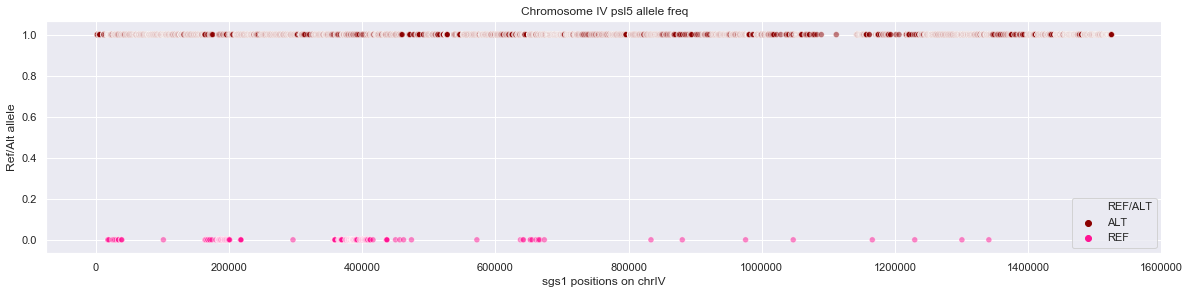

In [122]:
sns.set(rc={'figure.figsize':(20,4.27)})
p = sns.scatterplot(x = "sgs POS",
                   y = "Y",
                   hue = "REF/ALT",
                   data = final,
                   alpha = 0.5,
                   palette= ['darkred','deeppink'])
p.set(xlabel = "sgs1 positions on chrIV", ylabel = "Ref/Alt allele", 
                title = "Chromosome IV psl5 allele freq");
plt.savefig('ChrIV psl5 REF or ALT.png', dpi = 180, bbox_inches='tight')

## Plotting allele frequency for PSL5

sgs1 chromosome IV : 

ALT = psl5 

REF = psl2 (alt) (the 360 extra)

In [26]:
sgs1PosDict["chrIV"] #positions of sgs1 

# creating the psl5 dataframe
callset = allel.read_vcf('psl5.snp.vcf', fields = ['GT'])
psl5 = allel.vcf_to_dataframe('psl5.snp.vcf', fields = ['CHROM', 'POS'])[7773:15437]
gt = allel.GenotypeArray(callset['calldata/GT'][7773:15437]).tolist() # just the genotypes
gt[0:4]
chr4 = []
for item in gt:
    chr4.append(item[0])
psl5["GT"] = chr4 # positions of psl5 chrIV

# creating the psl2 dataframe
callset = allel.read_vcf('psl2.snp.vcf', fields = ['GT'])
psl2 = allel.vcf_to_dataframe('psl2.snp.vcf', fields = ['CHROM', 'POS'])[1582:2318]
gt = allel.GenotypeArray(callset['calldata/GT'][1582:2318]).tolist() # just the genotypes
gt[0:4]
chr4 = []
for item in gt:
    chr4.append(item[0])
psl2["GT"] = chr4 # positions of psl2 chrIV

In [27]:
psl5.head()

,CHROM,POS,GT
7773,chrIV,181,"[0, 1]"
7774,chrIV,212,"[1, 1]"
7775,chrIV,757,"[1, 0]"
7776,chrIV,774,"[0, 1]"
7777,chrIV,778,"[1, 0]"


In [28]:
psl2.head()

,CHROM,POS,GT
1582,chrIV,2008,"[1, 1]"
1583,chrIV,2009,"[1, 1]"
1584,chrIV,2035,"[1, 1]"
1585,chrIV,2151,"[1, 1]"
1586,chrIV,2152,"[1, 1]"


In [29]:
freq = pd.DataFrame()
freq["POS"] = sgs1PosDict["chrIV"]
strain = []
y = []

for pos in freq["POS"]:
    if psl5["POS"].isin([pos]).any() == True and psl2["POS"].isin([pos]).any() == False:
        strain.append("psl5A")
        y.append(1)
        
    elif psl2["POS"].isin([pos]).any() == True and psl5["POS"].isin([pos]).any() == False:
        strain.append("psl5R")
        y.append(1)
     
freq["PSL5"] = strain
freq["Y"] = y


strain = []
y = []

freq2 = pd.DataFrame()
freq2["POS"] = sgs1PosDict["chrIV"]
for p in freq["PSL5"]:
    if p == "psl5A":
        strain.append("psl2R")
        y.append(0)
        
    elif p == "psl5R":
        strain.append("psl2A")
        y.append(0)
        
freq2["PSL2"] = strain
freq2["Y"] = y


In [30]:
freq.head()

,POS,PSL5,Y
0,1647,psl5A,1
1,1875,psl5A,1
2,1993,psl5A,1
3,2002,psl5A,1
4,2256,psl5A,1


In [31]:
freq2.head()

,POS,PSL2,Y
0,1647,psl2R,0
1,1875,psl2R,0
2,1993,psl2R,0
3,2002,psl2R,0
4,2256,psl2R,0


In [32]:
# sns.set(rc={'figure.figsize':(15,4.27)})
# p = sns.scatterplot(x = "POS",
#                    y = "Y",
#                    hue = "Strain",
#                     palette= ['darkred','deeppink'],
#                    data = freq,
#                    alpha = 0.15)
# p.set(xlabel = "sgs1 positions on chrIV", ylabel = "origin strain", 
#                 title = "Chromosome IV sgs1 allele freq");
# #plt.savefig('Chromosome IV sgs1 allele freq (2)', dpi = 180, bbox_inches='tight')

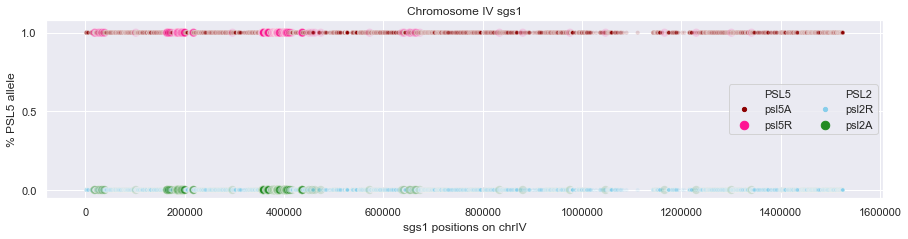

In [123]:
sns.set(rc={'figure.figsize':(15,3.27)})
sns.scatterplot(x = "POS",
                   y = "Y",
                   hue = "PSL5",
                    palette= ['darkred','deeppink'],
                   data = freq,
                   alpha = 0.15,
                   size = "PSL5",
                   size_order = ["psl5R", "psl5A"])
sns.scatterplot(x = "POS",
                   y = "Y",
                   hue = "PSL2",
                    palette= ['skyblue','forestgreen'],
                   data = freq2,
                   alpha = 0.15,
                   size = "PSL2",
                   size_order = ["psl2A", "psl2R"])
plt.yticks([0,0.5,1])
plt.title("Chromosome IV sgs1");
plt.xlabel("sgs1 positions on chrIV")
plt.ylabel("% PSL5 allele")
plt.legend(ncol = 2,)
plt.savefig('Chromosome IV sgs1 (PSL5)', dpi = 180, bbox_inches='tight')

In [110]:
c = allel.read_vcf('psl2.snp.vcf', fields = ['GT'])
IV = allel.vcf_to_dataframe('psl2.snp.vcf', fields = ['CHROM', 'POS'])

In [119]:
IV["CHROM"][1582:2318]

1582    chrIV
1583    chrIV
1584    chrIV
1585    chrIV
1586    chrIV
        ...  
2313    chrIV
2314    chrIV
2315    chrIV
2316    chrIV
2317    chrIV
Name: CHROM, Length: 736, dtype: object